In [1]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

# Defining column names for datasets
COLUMN_NAMES = [
        'SepalLength', 
        'SepalWidth',
        'PetalLength', 
        'PetalWidth', 
        'Species'
        ]

In [3]:
batch_size = 512
# Import training dataset
training_dataset = pd.read_csv('iris_training.csv', names=COLUMN_NAMES, header=0)
train_x = training_dataset.iloc[:, 0:4].values
train_y = training_dataset.iloc[:, 4].values

# Encoding training dataset
encoding_train_y = np_utils.to_categorical(train_y)

# Import testing dataset
test_dataset = pd.read_csv('iris_test.csv', names=COLUMN_NAMES, header=0)
test_x = test_dataset.iloc[:, 0:4].values
test_y = test_dataset.iloc[:, 4].values

# Encoding training dataset
encoding_test_y = np_utils.to_categorical(test_y)

In [4]:
test_dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1
5,6.2,2.9,4.3,1.3,1
6,5.5,4.2,1.4,0.2,0
7,6.3,2.8,5.1,1.5,2
8,5.6,3.0,4.1,1.3,1
9,6.7,2.5,5.8,1.8,2


In [5]:
# Creating a model
model_1 = Sequential()
model_1.add(Dense(10, input_dim=4, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(3, activation='softmax'))
model_1.name="model_1"

model_2 = Sequential()
model_2.add(Dense(10, input_dim=4, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(3, activation='softmax'))
model_2.name="model_2"

models = [model_1, model_2]


In [6]:
train_x, validate_x, train_y, validate_y = train_test_split(train_x, train_y, test_size = 0.2, random_state=12345)

In [7]:
for model in models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_6 (Den

In [8]:
history_dict = {}
for model in models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer = Adam(),
        metrics=['accuracy'])
    history = model.fit(
        train_x, train_y,
        batch_size=batch_size,
        epochs=300, verbose=False,
        validation_data=(validate_x, validate_y))
    history_dict[model.name] = history
    

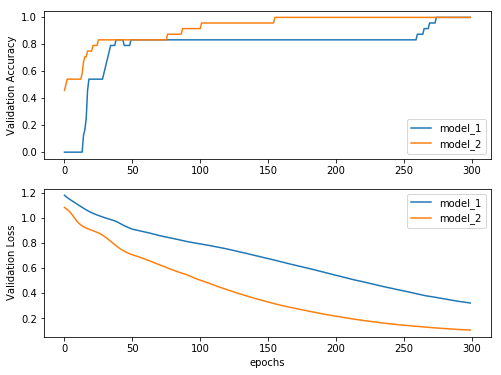

In [10]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history )
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [11]:
# evaluate the model
scores = model.evaluate(train_x, train_y)
print("\nAccuracy: %.2f%%" % (scores[1]*100))


96/96 [==============================] - 0s 50us/step

Accuracy: 97.92%


In [13]:
i=1
for model in models:
    score = model.evaluate(test_x, test_y, verbose=1)
    print('model_',i)
    print('Test Loss : {:.4f}'.format(score[0]))
    print('Test Acc  : {:.4f}'.format(score[1]))
    i +=1


30/30 [==============================] - 0s 245us/step
model_ 1
Test Loss : 0.4682
Test Acc  : 0.9000
30/30 [==============================] - 0s 76us/step
model_ 2
Test Loss : 0.1106
Test Acc  : 1.0000
